           DATE   PPI Export_PI Import_PI  Employees Export_PI_Nosemi  \
180  01-01-2000  88.8       102       101      641.0            102.7   
181  01-02-2000  88.6     101.9     100.7      646.0            100.5   
182  01-03-2000  88.6     101.3     100.3      649.0            100.5   
183  01-04-2000  88.9     101.4     101.2      654.3            100.1   
184  01-05-2000  88.5       101     100.6      659.1            100.2   
..          ...   ...       ...       ...        ...              ...   
414  01-07-2019  55.4      60.3      57.7      377.3               45   
415  01-08-2019  55.5      60.5      57.3      377.1             44.8   
416  01-09-2019  55.6      60.5      57.3      377.7               45   
417  01-10-2019  55.6      59.7      57.3      376.0             44.4   
418  01-11-2019  55.5      59.9      57.4      376.5             44.3   

     Weights Import_PI_Cap  Export_PI_Cap  Industrial_Production  
180   8.2930         100.5          100.0               

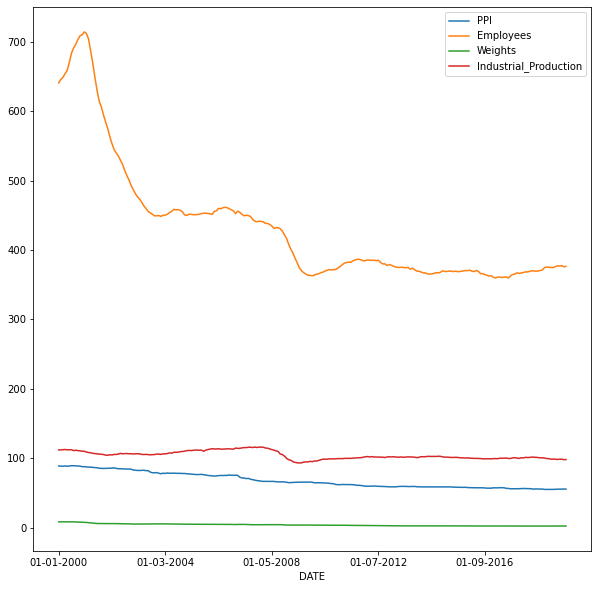

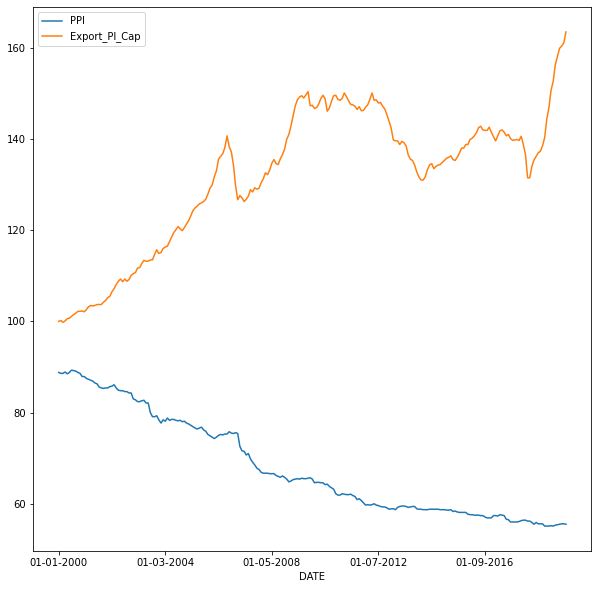

           DATE   PPI Export_PI Import_PI Export_PI_Nosemi Import_PI_Cap  \
180  01-01-2000  88.8       102       101            102.7         100.5   
181  01-02-2000  88.6     101.9     100.7            100.5         100.4   
182  01-03-2000  88.6     101.3     100.3            100.5         100.1   
183  01-04-2000  88.9     101.4     101.2            100.1         100.5   
184  01-05-2000  88.5       101     100.6            100.2         100.4   
..          ...   ...       ...       ...              ...           ...   
414  01-07-2019  55.4      60.3      57.7               45           114   
415  01-08-2019  55.5      60.5      57.3             44.8           114   
416  01-09-2019  55.6      60.5      57.3               45         113.9   
417  01-10-2019  55.6      59.7      57.3             44.4         113.8   
418  01-11-2019  55.5      59.9      57.4             44.3         113.7   

     Export_PI_Cap  
180          100.0  
181          100.2  
182           99.8  
183

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

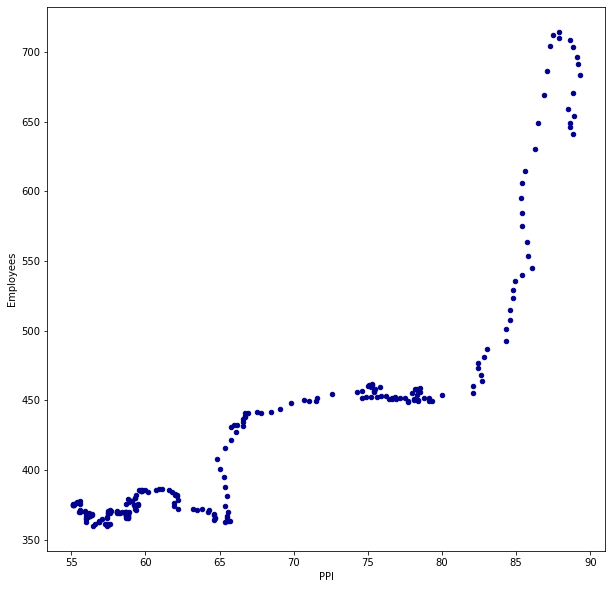

In [13]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Bring in all the STAT goodies
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Read raw data file
# I first tried using the default, long variable (column) names from original data file
# Then tried to "rename" the columns in Python - couldn't get it to work (will need more time)
# So I found it easier to rename the columns in the original *.csv file (new file named "Semi.csv")
semi_raw = pd.read_csv (r'C:\Users\Christian\OneDrive\Graduate School\ANA500\Semi.csv')

# Noticed several missing values; limiting variable (with most missing values) was Export_PI_Cap
# So filtered by recasting table using notnull() Boolean subtable:
semi = semi_raw[semi_raw.Export_PI_Cap.notnull()]

# Print the filtered (cleaned) dataframe
print (semi)

# Plot the generalized variables by DATE:
df_gen = pd.DataFrame(semi, columns=["DATE", "PPI", "Employees", "Weights", "Industrial_Production"])
df_gen.plot(x="DATE", y=["PPI", "Employees", "Weights", "Industrial_Production"], kind="line", figsize=(10,10))
plt.show()

# Plot the pricing variables by DATE:
# Note: could not figure out why some of the price index variables were not plotting
df_ppi = pd.DataFrame(semi, columns=["DATE", "PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"])
df_ppi.plot(x="DATE", y=["PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"], kind="line", figsize=(10,10))
plt.show()

# Check to see that extracted data frame has all requested columns; still not sure why not plotting
print(df_ppi)

# Scatter plot - hints at the correlation between my two variables in the null hypothesis
df_scatter = pd.DataFrame(semi, columns=["PPI", "Employees"])
ax1 = semi.plot.scatter(x="PPI", y="Employees", c="DarkBlue", figsize=(10,10))

# Build Regression Model
X = semi['Export_PI']
y = semi['PPI']

X2 = sm.add_constant(X)
est1 = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())